# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Quinn | Ledingham | Quinn Ledingham, 18-10-2024 | 4 | 25% |
| Member 2: | Muhammad Ayan | Khan | Muhammad Ayan Khan, 05-10-2024 | 3 | 25% |
| Member 3: | Gretchen | Ge | Gretchen GE, 18-10-2024 | 4 | 25% |
| Member 4: | ZAREK | ZHAI | ZAREK ZHAI, 18-10-2024 | 4 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

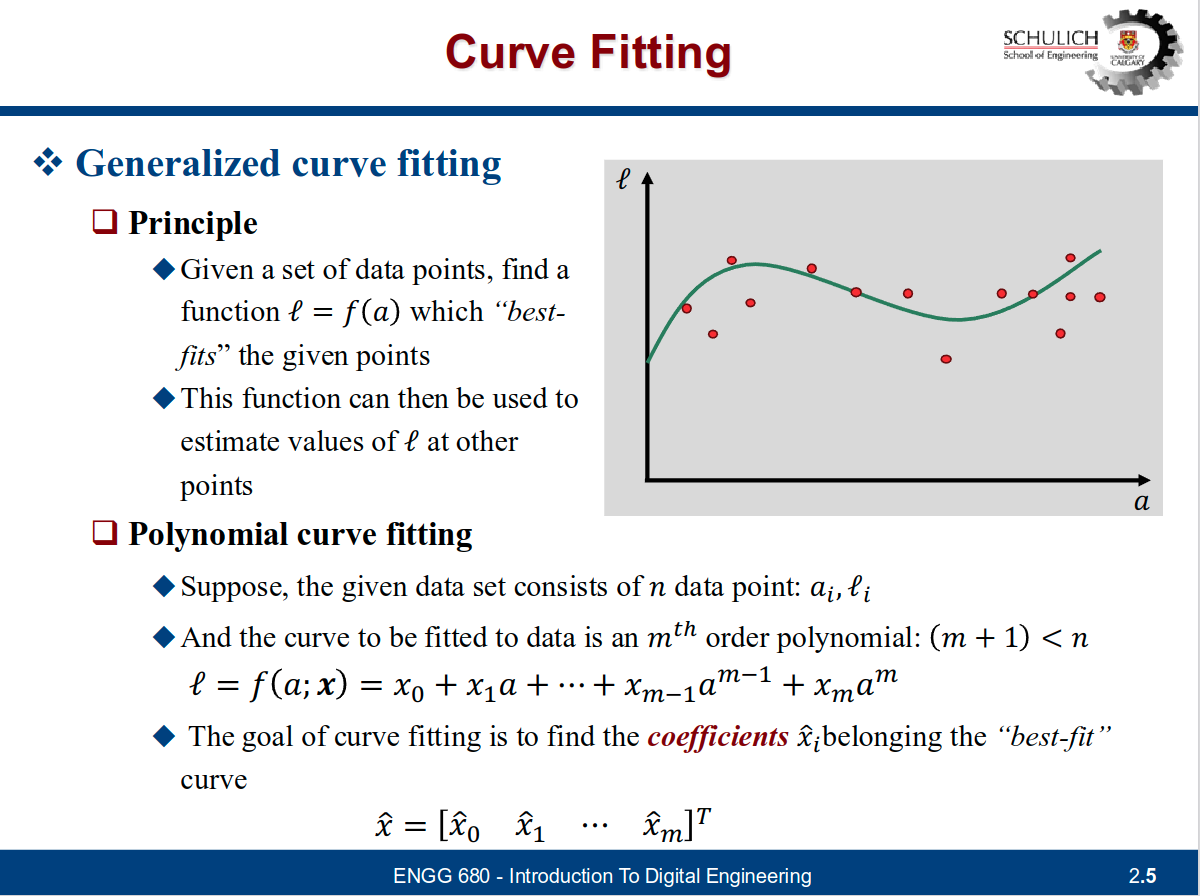

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [83]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
import os
import sys
if 'google.colab' in sys.modules:
  if not os.path.isdir('/content/drive/'):
    from google.colab import drive
    drive.mount('/content/drive/')

  %cd /content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2

In [85]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx') # Updating the path
arr_data = df_data.to_numpy() # Dataframe is converted to numpy array

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0] # 1st Column = observations with noise
l_var = arr_data[:,1] # 2nd Column = variance of observations
l_true = arr_data[:,2] # 3rd Column = True observations

In [86]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l) # No. of observations is the length of the noisy observations array

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n) # Defining the obs wt matrix P as an identity matrix

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

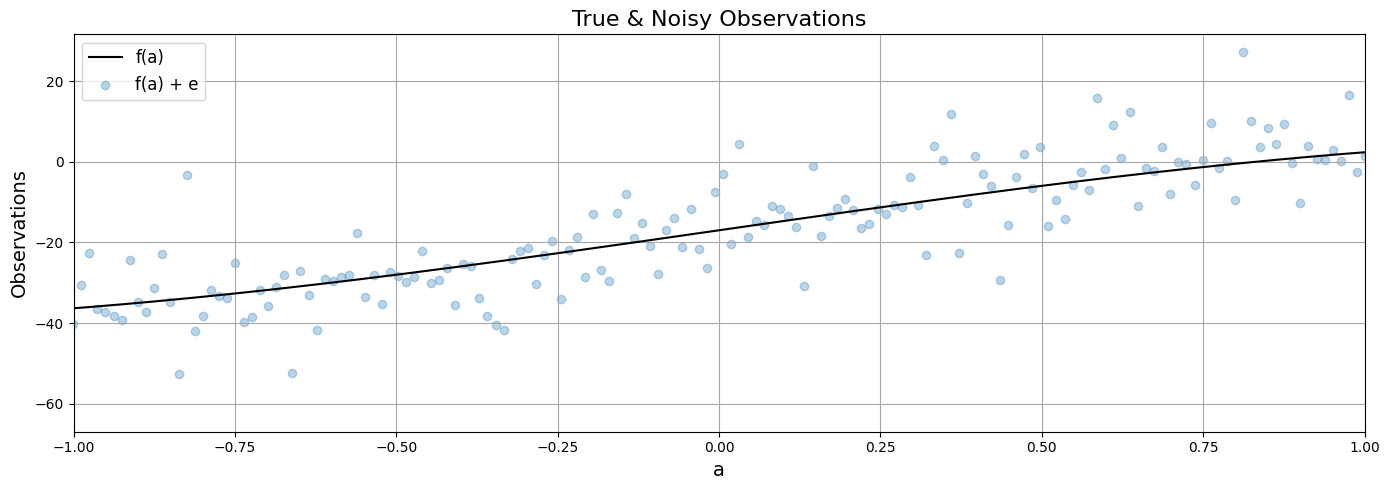

In [87]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label='f(a)', color='k')  # As said in the 3rd comment of step 4, Also True observation = line

ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # As in 2nd & 4th comment of step 4

ax.set_xlabel('a', fontsize=14) # Axis labels
ax.set_ylabel('Observations', fontsize=14) # Axis labels

ax.set_title('True & Noisy Observations', fontsize=16) #Axis Title

ax.set_xlim([-1, 1]) # Scaling the range of x-axis to be -1 to 1

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

ax.legend(fontsize=12) # Adding a legend

plt.show() # Printing the plot

In [88]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # 'A' is the vandermonde matrix where each column represents a term of the polynomial a^i (from degree 0 to deg)
    A = np.vander(a, deg + 1, increasing=True)  # increasing=True ensures [1, a, a^2, ...]

    # Firstly, x = (A^T P A)^(-1) (A^T P l)
    # This provides the polynomial coefficients that minimize the weighted residuals
    AtPA = A.T @ P @ A # (A^T P A)

    AtPl = A.T @ P @ l # (A^T P l)

    x = np.linalg.inv(AtPA) @ AtPl # estimated polynomial coefficients

    v = l - A @ x # v: residuals = observed data - modeled data (l - A @ x)

    # Secondly, APV = (v^T P v) / (n - m)
    # recall n = len(l)
    m = deg + 1
    apv = (v.T @ P @ v) / (n - m) # m = number of parameters (deg + 1)

    cov_x = apv * np.linalg.inv(AtPA)  # covariance of x = APV * (A^T P A)^(-1)

    return (x, cov_x, apv, v)

In [89]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

x_1, cov_x_1, apv_1, v_1 = fit_polynomial_curve(a, l, P, 1) # polynomial deg 1
x_3, cov_x_3, apv_3, v_3 = fit_polynomial_curve(a, l, P, 3) # polynomial deg 3
x_5, cov_x_5, apv_5, v_5 = fit_polynomial_curve(a, l, P, 5) # polynomial deg 5

In [90]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(np.flip(x_1), a)
cubic_uw = np.polyval(np.flip(x_3), a)
quintic_uw = np.polyval(np.flip(x_5), a) 

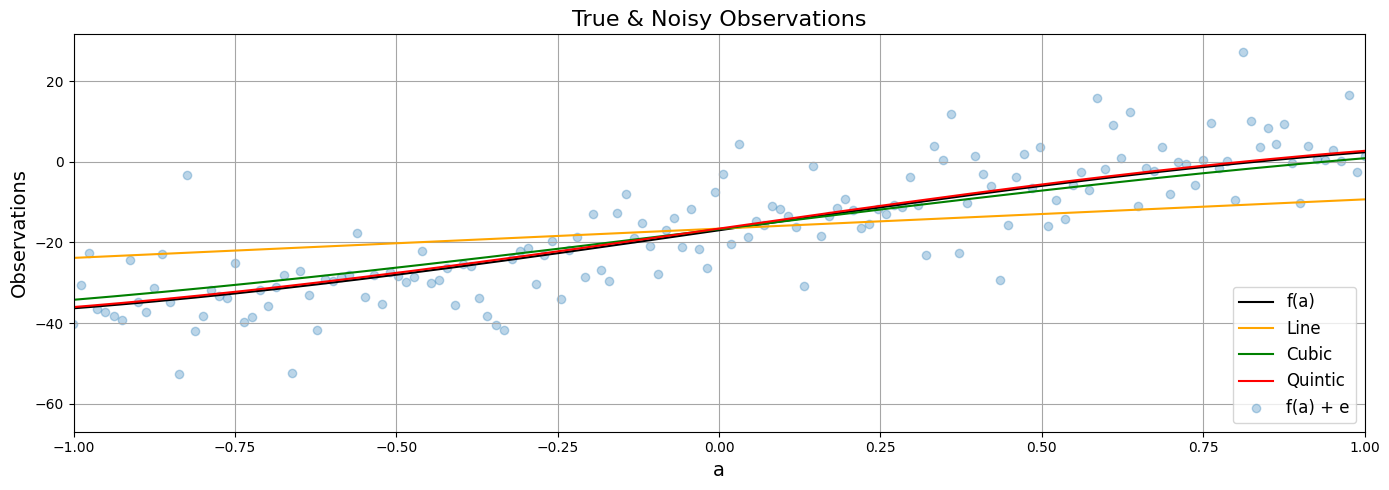

In [91]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)
def plot_polynomials(line_uw, cubic_uw, quintic_uw):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

    ax.plot(a, l_true, label='f(a)', color='k') # plotting the true observations (Color representation shown at output for f(a))

    ax.plot(a, line_uw, label='Line', color='orange') # linear polynomial
    ax.plot(a, cubic_uw, label='Cubic', color='green') # cubic polynomial
    ax.plot(a, quintic_uw, label='Quintic', color='red') # quintic polynomial

    ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3) #Plotting the noisy observations

    ax.set_xlabel('a', fontsize=14) # axis lables
    ax.set_ylabel('Observations', fontsize=14) # axis lablels

    ax.set_title('True & Noisy Observations', fontsize=16) # title for the graph

    ax.set_xlim([-1, 1]) # range provided

    ax.grid(True, which='both',ls='-',color='0.65') # adding grid
    fig.tight_layout() # prevention of clipping

    ax.legend(fontsize=12) # adding a legend

    plt.show()

    ax.grid(True, which='both',ls='-',color='0.65')

    fig.tight_layout()

plot_polynomials(line_uw, cubic_uw, quintic_uw)

In [92]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(apv_1)
print(apv_3)
print(apv_5)

162.742608604322
66.13227783131883
63.7583446301842


In [93]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

print(np.linalg.norm(line_uw - l_true))
print(np.linalg.norm(cubic_uw - l_true))
print(np.linalg.norm(quintic_uw - l_true))

229.0601679674409
38.285979929116735
17.369967196964527


In [94]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# The posterier variance factor and norm get lower as the degree of polynomial increases meaning that 
# the higher degree curves fit better.

In [95]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

P = np.diag(1/ l_var)

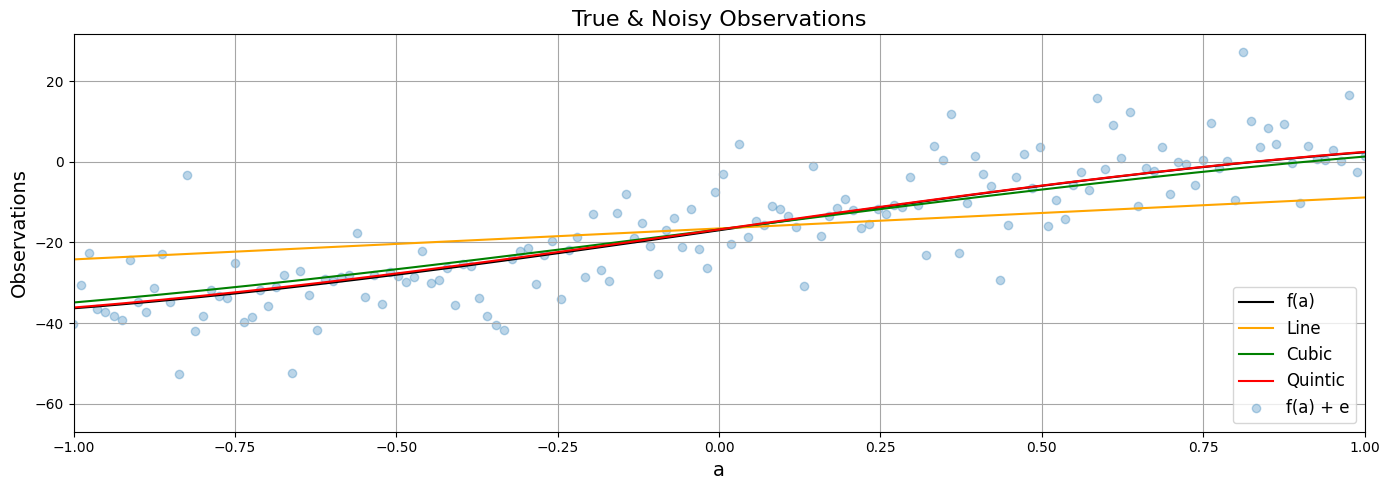

Posterier variance factors
12.054651233436903
1.1444647026537127
0.944700904385655
L2 Norms
230.67760813832945
36.07026687266812
5.741606915880297


In [96]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

x_1, cov_x_1, apv_1, v_1 = fit_polynomial_curve(a, l, P, 1) # polynomial deg 1
x_3, cov_x_3, apv_3, v_3 = fit_polynomial_curve(a, l, P, 3) # polynomial deg 3
x_5, cov_x_5, apv_5, v_5 = fit_polynomial_curve(a, l, P, 5) # polynomial deg 5

# construct polynomials
line_uw = np.polyval(np.flip(x_1), a) 
cubic_uw = np.polyval(np.flip(x_3), a)
quintic_uw = np.polyval(np.flip(x_5), a)

plot_polynomials(line_uw, cubic_uw, quintic_uw)

print("Posterier variance factors")
print(apv_1)
print(apv_3)
print(apv_5)

print("L2 Norms")
print(np.linalg.norm(line_uw - l_true))
print(np.linalg.norm(cubic_uw - l_true))
print(np.linalg.norm(quintic_uw - l_true))

In [97]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# All the posterier variance factors are much lower and most of the L2 norms are lower for the weighted LSE compared to the same values for the unweighted LSE.
# The weighted LSE created curves that fits the real observations better than the unweighted LSE by giving reliable measurements more weight.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

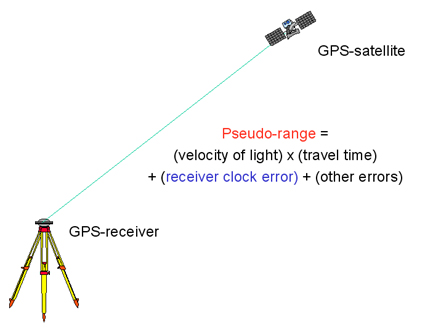

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [98]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel("pseudoranges.xlsx")
df_sat_pos = pd.read_excel("satellite_position.xlsx")

pseudorange = df_pseudorange. to_numpy()
sat_pos = df_sat_pos.to_numpy()
print("Pseudorange):")
print(pseudorange)

print("Satellite Position):")
print(sat_pos)


Pseudorange):
[[7.00000000e+00 2.29197410e+07]
 [8.00000000e+00 2.04598941e+07]
 [1.10000000e+01 2.24003384e+07]
 [1.50000000e+01 2.28291409e+07]
 [1.70000000e+01 2.23420148e+07]
 [1.80000000e+01 2.56464545e+07]
 [1.90000000e+01 2.38147762e+07]
 [2.40000000e+01 2.43113993e+07]
 [2.60000000e+01 2.13536401e+07]
 [2.70000000e+01 2.49716096e+07]
 [2.80000000e+01 2.06389811e+07]]
Satellite Position):
[[ 7.00000000e+00  5.28079174e+06 -2.55014601e+07  4.64950829e+06]
 [ 8.00000000e+00 -2.15965605e+06 -2.11160248e+07  1.55979092e+07]
 [ 1.10000000e+01  1.03718522e+07 -2.17131113e+07  1.05586870e+07]
 [ 1.50000000e+01 -1.60857608e+07  4.28507122e+06  2.07420421e+07]
 [ 1.70000000e+01 -1.43129881e+07 -2.20450143e+07  4.67120840e+06]
 [ 1.80000000e+01 -2.43571819e+06  1.62572051e+07  2.10997795e+07]
 [ 1.90000000e+01  1.59124672e+07 -3.46251531e+06  2.10536283e+07]
 [ 2.40000000e+01  1.62718482e+07 -2.18766320e+05  2.10353327e+07]
 [ 2.60000000e+01 -1.92470355e+07 -7.25980368e+06  1.64729819e+07

In [99]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = df_pseudorange.shape[0]
m = 4

In [100]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [101]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [102]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [103]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [104]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
  return distance

In [105]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  A = np.zeros((n,4))
  for i in range(n):
        delta_x = s_pos[i, 0] - r_pos[0]
        delta_y = s_pos[i, 1] - r_pos[1]
        delta_z = s_pos[i, 2] - r_pos[2]
        # partial derivatives
        A[i, 0] = -delta_x / rho[i]
        A[i, 1] = -delta_y / rho[i]
        A[i, 2] = -delta_z / rho[i]
        A[i, 3] = 1
  return A

In [106]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

while (np.linalg.norm(delta[:3]) >= 0.001):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:4])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos[:, 1:4], rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 1] - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta

       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat[:3] - GroundTruth

       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)


# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
# Using misclosure/residual vector
apv = (w.T @ P @ w) / (n - m)


# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

In [107]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated States:")
print(x_hat)

print("Corrections Array:")
print(delta)

print("Estimated Measurements Residuals:")
print(w)

print("A Posteriori Variance of Unit Weight:")
print(apv)

print("Covariance Matrix of Estimated States:")
print(C_x_hat)

print("Number of Iterations:")
print(i)

print("3-D Position Errors:")
print(err_pos)

Estimated States:
[-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.47201389e+00]
Corrections Array:
[ 3.23113755e-06  6.39397325e-06 -1.75963170e-05 -2.09206393e-05]
Estimated Measurements Residuals:
[ 0.25995968  0.11116656 -1.09951518 -0.00500947  0.2003028  -1.41816897
 -0.09127866  1.51207884  0.26364719  0.61137232 -0.34467609]
A Posteriori Variance of Unit Weight:
0.8852888535930045
Covariance Matrix of Estimated States:
[[ 0.28298264  0.06167139 -0.07487066 -0.06468701]
 [ 0.06167139  0.37666273 -0.51441611 -0.32601524]
 [-0.07487066 -0.51441611  1.81094828  0.9773772 ]
 [-0.06468701 -0.32601524  0.9773772   0.61904475]]
Number of Iterations:
5
3-D Position Errors:
[-3.06483961 -2.3598758   3.81315917]


In [108]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# The A Posteriori Variance of Unit Weight (0.8853) indicates a reasonable fit, suggesting the model matches the observations well.
# The Covariance Matrix of Estimated States shows lower uncertainty in x and y coordinates compared to z, with notable correlation between parameters.

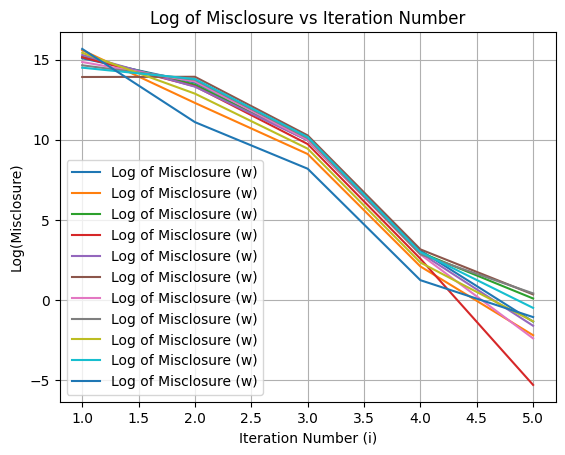

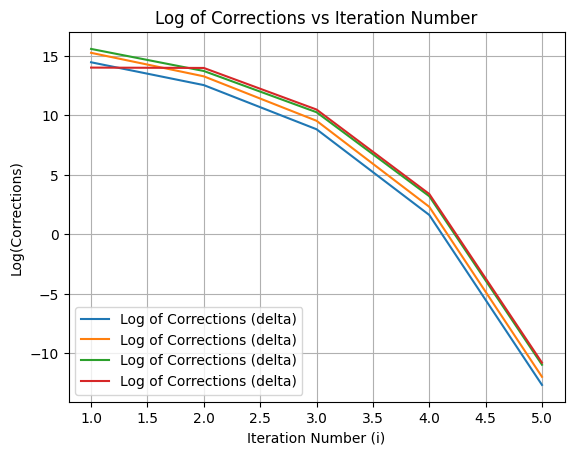

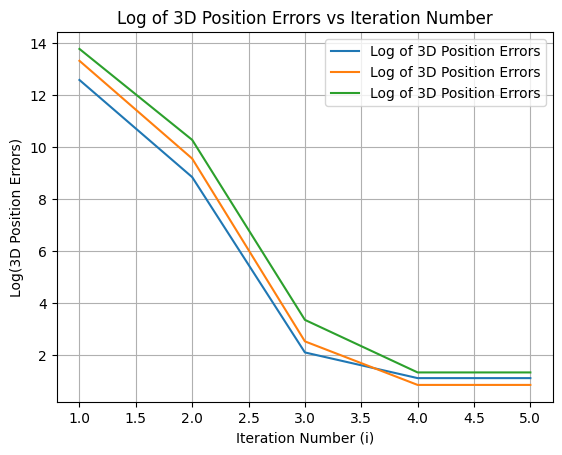

In [109]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import matplotlib.pyplot as plt
import numpy as np

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(Misclosure)')
plt.title('Log of Misclosure vs Iteration Number')
plt.legend()
plt.grid()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections (delta)') # Use the same arr_i
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(Corrections)')
plt.title('Log of Corrections vs Iteration Number')
plt.legend()
plt.grid()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Errors') # Use the same arr_i
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(3D Position Errors)')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.legend()
plt.grid()
plt.show()

In [110]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# 1. Log of Misclosure vs Iteration: The misclosure decreases consistently,
#  indicating the model fits the observations better with each iteration.
# 2. Log of Corrections vs Iteration: The corrections diminish, implying
#  that the estimated state is converging towards the true values.
# 3. Log of 3D Position Errors vs Iteration: The position errors reduce
#  significantly initially, showing fast initial convergence, and then stabilize as the estimates approach the final solution.

In [111]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!